In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('../input/train.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


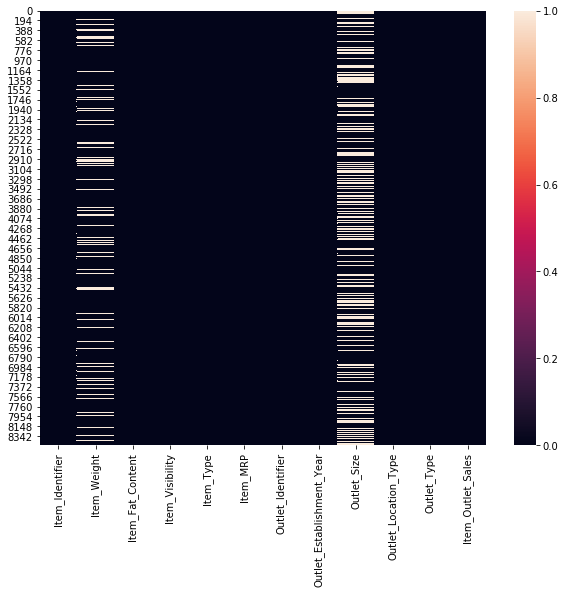

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull())

In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [8]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

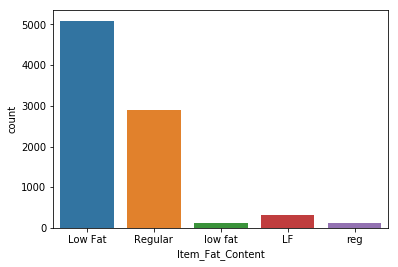

In [9]:
sns.countplot(x=data['Item_Fat_Content'], data=data)

In [10]:
def replace_item(item):
    if (item == 'Low Fat'):
        return 'LF'
    elif (item == 'Regular'):
        return 'RE'
    elif item == 'low fat' :
        return 'LF'
    elif item == 'reg':
        return 'RE'
    elif item == 'LF':
        return 'LF'
    else :
        return 'OT'

In [11]:
#data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'Low Fat':'LF','Regular':'RE','low fat':'LF','reg':'RE', np.NaN:0})
data['Item_Fat_Content'] = data['Item_Fat_Content'].apply(replace_item)

In [12]:
data['Item_Fat_Content'].unique()

array(['LF', 'RE'], dtype=object)

In [13]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,RE,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


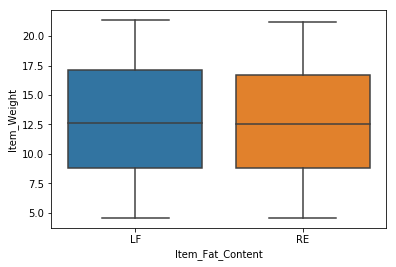

In [14]:
sns.boxplot(x=data['Item_Fat_Content'], y=data['Item_Weight'], data=data)

In [15]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

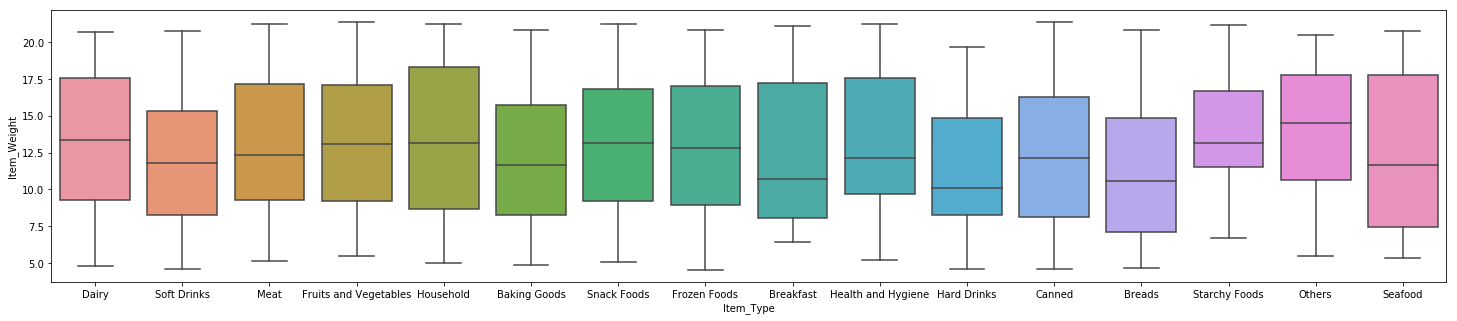

In [16]:
plt.figure(figsize=(25,5))
sns.boxplot(x=data['Item_Type'], y=data['Item_Weight'], data=data)

In [17]:
#data[['Item_Fat_Content','Item_Weight','Item_Type']].apply(null_imputer)
data2 = data.copy()

In [18]:
data2.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
def null_imputer(item):
    item_weight = item[0]
    item_type = item[1]
    item_fat = item[2]
    if pd.isnull(item_weight) :
        return 12.5
    else:
        return item_weight

In [20]:
#data[['Item_Fat_Content','Item_Weight','Item_Type']].apply(null_imputer)
data2['Item_Weight'] = data2[['Item_Weight','Item_Type','Item_Fat_Content']].apply(null_imputer, axis=1)

In [21]:
data2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
temp_df = data2[data2['Outlet_Size'].isnull()]

In [23]:
temp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,RE,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,RE,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,RE,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,LF,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,RE,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [24]:
print("Missing Values from Tier: ", temp_df['Outlet_Location_Type'].unique())
print("Missing Values from Outlet Type: ", temp_df['Outlet_Type'].unique())

Missing Values from Tier:  ['Tier 3' 'Tier 2']
Missing Values from Outlet Type:  ['Grocery Store' 'Supermarket Type1']


In [25]:
temp2 = data2[data2['Outlet_Location_Type']=='Tier 2']

In [26]:
print("We are missing the Outlet Size values for Market Type: ",temp2[temp2['Outlet_Size'].isnull()]['Outlet_Type'].unique())

We are missing the Outlet Size values for Market Type:  ['Supermarket Type1']


In [27]:
temp2[temp2['Outlet_Type']=='Supermarket Type1'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,RE,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,RE,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,LF,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.60,LF,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.00,LF,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080


In [28]:
temp3 = data2[data2['Outlet_Location_Type']=='Tier 3']

In [29]:
#Checking for what outlet types and Supermarket types we are actually missing the Outlet size values:
print("We are missing the Outlet Size values for Market Type: ",temp3[temp3['Outlet_Size'].isnull()]['Outlet_Type'].unique())

We are missing the Outlet Size values for Market Type:  ['Grocery Store']


In [30]:
data2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [31]:
def size_imputer(item):
    size = item[0]
    tier = item[1]
    out_type = item[2]
    sales = item[3]
    
    if pd.isnull(size) :
        if tier == 'Tier 3' :
            if out_type == 'Grocery Store':
                return 'Low'
            elif out_type == 'Supermarket Type1':
                return 'High'
            else:
                return 'Medium'
        elif tier == 'Tier 2':
            if out_type == 'Supermarket Type1':
                if sales < 8479.6288 :
                    return 'Low'
                else:
                    return 'Medium'
        else:
            return size
    else:
        return size

In [32]:
data3 = data2.copy()

In [33]:
data3['Outlet_Size'] = data3[['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']].apply(size_imputer, axis=1)

In [34]:
data3.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [35]:
data4 = data3.copy()

In [36]:
fat_df = pd.get_dummies(data4['Item_Fat_Content'], drop_first=True, prefix='Item_Fat_Content')

In [37]:
item_type_df = pd.get_dummies(data4['Item_Type'], drop_first=True, prefix='Item_Type')

In [38]:
outlet_size_df = pd.get_dummies(data4['Outlet_Size'], drop_first=True, prefix='Outlet_Size')

In [39]:
outlet_type_df = pd.get_dummies(data4['Outlet_Type'], drop_first=True, prefix='Outlet_Type')

In [40]:
tier_df = pd.get_dummies(data4['Outlet_Location_Type'], drop_first=True)

In [41]:
final_df = pd.concat([data4[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']],fat_df,item_type_df,outlet_size_df,
                     outlet_type_df,tier_df], axis=1)

In [42]:
X = final_df.drop(['Item_Outlet_Sales'], axis=1)
y = final_df['Item_Outlet_Sales']

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [44]:
rfr.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
rfr.score(X,y)

0.9165952746780074

In [46]:
## Using the training data itself by splitting it and testing it

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [49]:
rfr2 = RandomForestRegressor()

In [50]:
rfr2.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
rfr2.score(X_train, y_train)

0.9145334278684135

In [52]:
predictions = rfr2.predict(X_test)

In [53]:
from sklearn import metrics

In [54]:
print(metrics.mean_absolute_error(y_test, predictions))

816.2149217520532


In [55]:
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

1156.7806574868184


In [56]:
#This is a really good score

In [57]:
original_target_df = y_test.to_frame()

In [58]:
original_target_df.reset_index(inplace=True)

In [59]:
original_target_df.drop('index',axis=1, inplace=True)

In [60]:
pred_df = pd.DataFrame(data=predictions, columns=['Predicted Sales'])

In [61]:
compare_df = pd.concat([original_target_df, pred_df], axis=1, ignore_index=True)

In [62]:
compare_df.columns = ['Actual Values','Predicted Values']

In [63]:
compare_df.head()

,Actual Values,Predicted Values
0,904.8222,1686.73772
1,2795.6942,3638.99648
2,1947.4650,1498.84896
3,872.8638,549.81764
4,2450.1440,2960.54628
